# Churn Prediction

### Importing the libraries

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the dataset

In [61]:
data = pd.read_csv('data.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### column names

In [62]:
print("Shape of dataset: ", data.shape)
print("---------------------------------------------------------------")
print('Column Names: ')
print(data.columns)

Shape of dataset:  (10127, 23)
---------------------------------------------------------------
Column Names: 
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


### Removing irrelevant features

By looking into the data, we can clearly observe that we are not required the last two columns mentioned in the dataset. So we can remove it from the dataset

In [63]:
data = data.iloc[:, :-2]

In [64]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Dataset information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA

In [8]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### Gender w.r.t Attrition_Flag

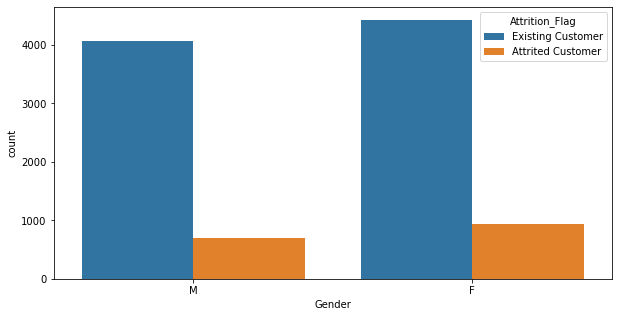

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender', data = data, hue = 'Attrition_Flag')
plt.show()

### Education level w.r.t Attrition_Flag

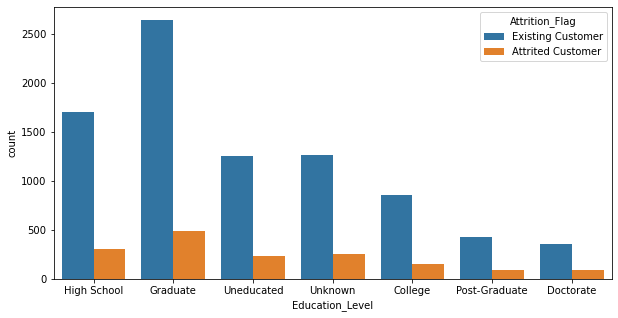

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education_Level', data = data, hue = 'Attrition_Flag')
plt.show()

### Marital_Status w.r.t Attrition_Flag

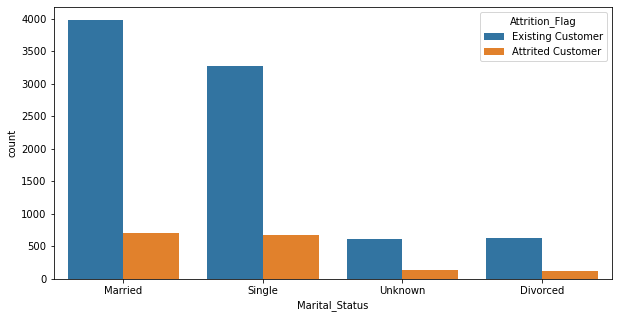

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Marital_Status', data = data, hue = 'Attrition_Flag')
plt.show()

In [44]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Income Category w.r.t Attrition_Flag

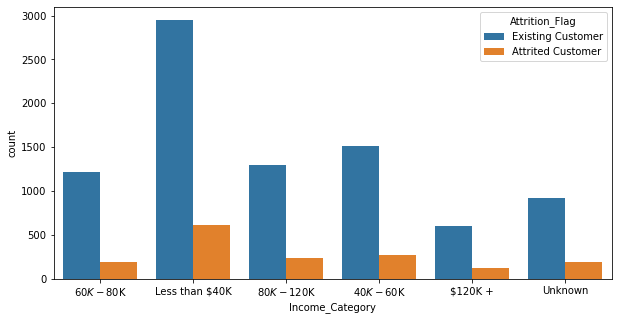

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Income_Category', data = data, hue = 'Attrition_Flag')
plt.show()

### Card_Category w.r.t Attrition_Flag

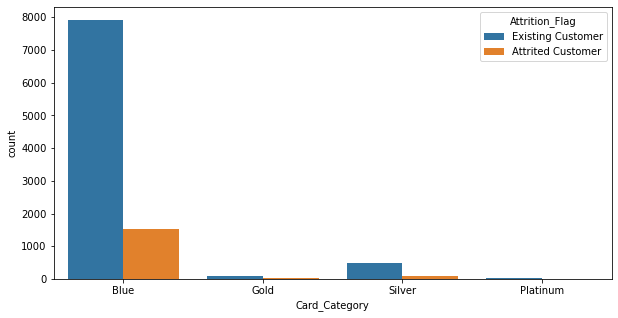

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Card_Category', data = data, hue = 'Attrition_Flag')
plt.show()

#Percentage wise distribution
(data['Card_Category'].value_counts()/data['Card_Category'].shape[0])*100

### Dependent_count w.r.t Attrition_Flag

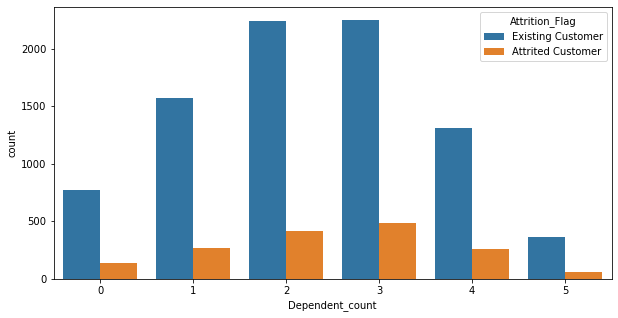

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Dependent_count', data = data, hue = 'Attrition_Flag')
plt.show()

In [15]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Month_on_book w.r.t Attrition_Flag

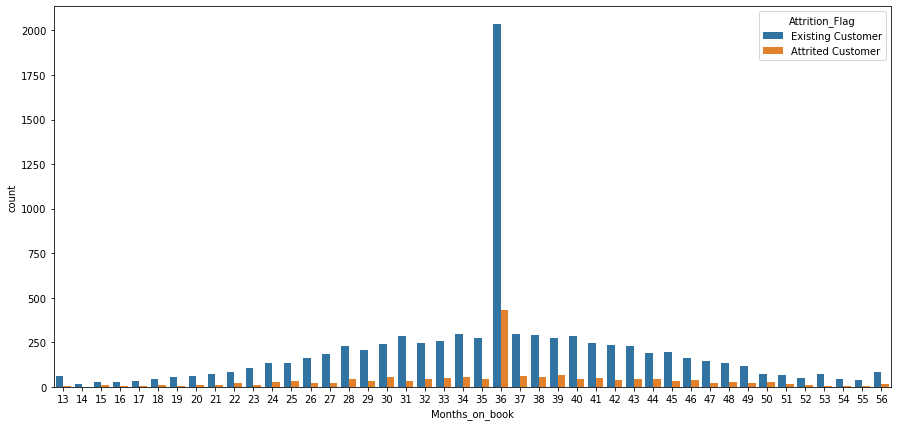

In [16]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Months_on_book', data = data, hue = 'Attrition_Flag')
plt.show()

In [17]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Total_Relationship_Count w.r.t Attrition_Flag

In [18]:
# Converting CLIENTNUM variable into string type for further analysis
data['CLIENTNUM'] = data['CLIENTNUM'].astype('str')

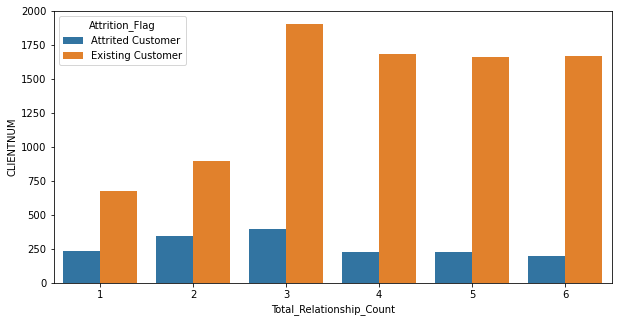

In [19]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

sns.barplot(x=data.groupby(['Total_Relationship_Count', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Total_Relationship_Count'],
            y=data.groupby(['Total_Relationship_Count', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['CLIENTNUM'],
            hue=data.groupby(['Total_Relationship_Count', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Attrition_Flag'])

plt.show()


### Months_Inactive_12_mon w.r.t Attrition_Flag

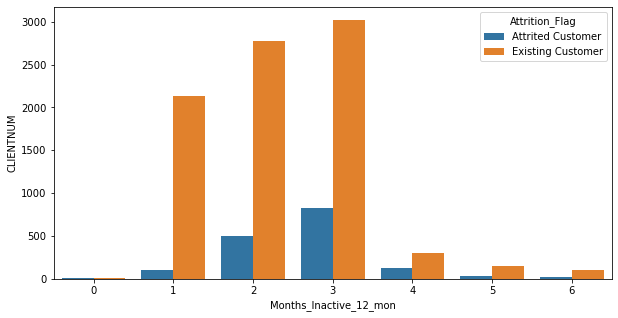

In [20]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

sns.barplot(x=data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Months_Inactive_12_mon'],
            y=data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['CLIENTNUM'],
            hue=data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Attrition_Flag'])

plt.show()


### Contacts_Count_12_mon w.r.t Attrition_Flag

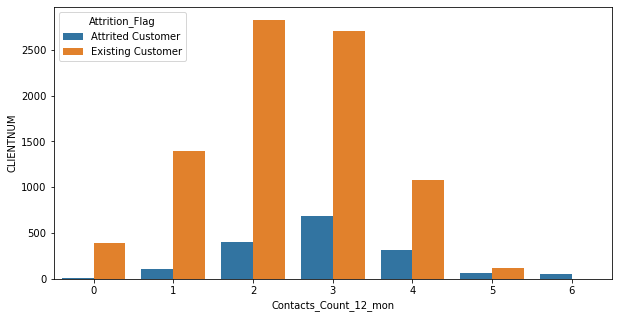

In [21]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

sns.barplot(x=data.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Contacts_Count_12_mon'],
            y=data.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['CLIENTNUM'],
            hue=data.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Attrition_Flag'])

plt.show()


### Plotting overlapped histogram for Existing and Attrited customers to check the difference in Credit Limit

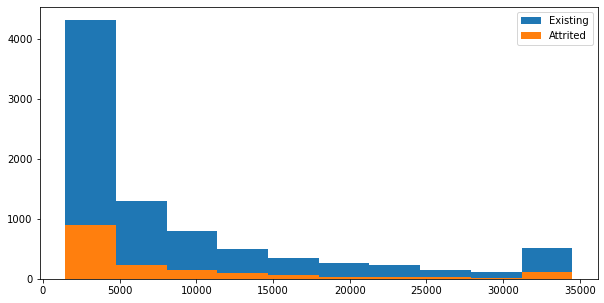

In [22]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

ax.hist(data[data['Attrition_Flag'] == 'Existing Customer']['Credit_Limit'], label = 'Existing')
ax.hist(data[data['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'], label = 'Attrited')
ax.legend()

plt.show()


In [49]:
dummy = np.array(np.random.rand(25)).reshape(5,5)

In [50]:
dummy

array([[0.6190786 , 0.81190322, 0.92409436, 0.4679743 , 0.1913816 ],
       [0.90070424, 0.61523076, 0.57433535, 0.79693517, 0.55893875],
       [0.84697931, 0.72915174, 0.52802854, 0.51454942, 0.522168  ],
       [0.85972066, 0.14241761, 0.88437151, 0.1779405 , 0.00197543],
       [0.89579111, 0.10703056, 0.55335857, 0.46185212, 0.03014786]])

In [56]:
mask = np.triu(np.ones_like(dummy, dtype=bool))

In [57]:
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

### Analysing Correlation using heatmap with some modifications into the plot.

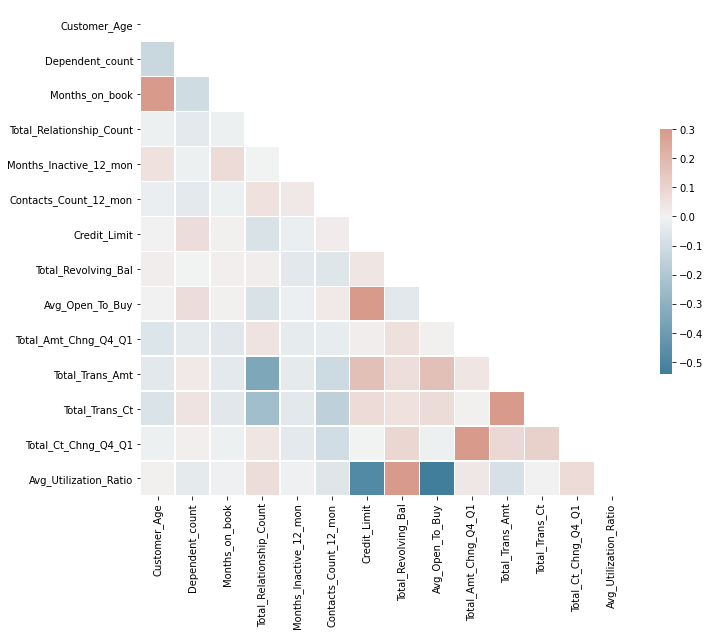

In [23]:
correlation = data.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Data Preprocessing

In [58]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [65]:
# Deleting CLIENTNUM feature which is irrelevant in further analysis.
ads_1 = data.drop(labels=['CLIENTNUM'], axis=1)

# Only considering two types of cards, Blue and others.
ads_1['Card_Category'] = np.where(ads_1['Card_Category']=='Blue', 'Blue', 'Other')
print(ads_1['Card_Category'].value_counts(), '\n')

# Converting target feature from string attribute to numeric attribute
ads_1['Attrition_Flag'] = np.where(ads_1['Attrition_Flag'] == 'Existing Customer', 0, 1)
print(ads_1['Attrition_Flag'].value_counts(), '\n')

ads_1.head()

Blue     9436
Other     691
Name: Card_Category, dtype: int64 

0    8500
1    1627
Name: Attrition_Flag, dtype: int64 



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Converting Customer age into categorical feature

In [66]:
print('Mean of Customer Age: ', np.mean(data['Customer_Age']), '\n')
print('Std Dev of Customer Age: ', np.std(data['Customer_Age']), '\n')

def ageTransformer(x):
  if x <= 30:
    return 'LT_30'
  elif (x >= 31) & (x <= 40):
    return 'Bet_31_40'
  elif (x >= 41) & (x <= 50):
    return 'Bet_41_50'
  elif (x >= 51) & (x <= 60):
    return 'Bet_51_60'
  elif x > 60:
    return 'GT_60'

ads_1['Customer_Age'] = ads_1['Customer_Age'].astype('int')
ads_1['Customer_Age'] = ads_1['Customer_Age'].apply(lambda x: ageTransformer(x))
print(ads_1['Customer_Age'].value_counts())

Mean of Customer Age:  46.32596030413745 

Std Dev of Customer Age:  8.01641820891176 

Bet_41_50    4652
Bet_51_60    2673
Bet_31_40    2132
GT_60         405
LT_30         265
Name: Customer_Age, dtype: int64


In [26]:
ads_1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,Bet_41_50,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,Bet_41_50,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,Bet_51_60,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,Bet_31_40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,Bet_31_40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Data preprocessing of categorical features and continuous features seperately.

In [67]:
ads_1a = ads_1.iloc[:, :12]
ads_1b = ads_1.iloc[:, 12:]
ads_1b.head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Feature Scaling of continuous features.

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
fs = StandardScaler()
ads_1b = pd.DataFrame(fs.fit_transform(ads_1b), columns = ads_1b.columns)

In [70]:
ads_1b

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...
10122,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


### Reducing no. of continuous features (Dimensionality Reduction)

In [71]:
from sklearn.decomposition import PCA
pcaObj = PCA(n_components = 2)
ads_2b = pd.DataFrame(pcaObj.fit_transform(ads_1b), columns=['pc_1', 'pc_2'])

print(pcaObj.explained_variance_ratio_)
ads_2b.head()

[0.31420002 0.23211701]


,pc_1,pc_2
0,0.520621,0.012592
1,-0.326841,2.557942
2,-0.511518,1.208880
3,-2.571155,1.811664
4,-0.360225,1.053481


### Converting string categorical features into numeric categorical features

In [72]:
print('shape of DF before transformation', ads_1a.shape, '\n')
ads_2a = pd.get_dummies(ads_1a)

print('shape of DF After transformation', ads_2a.shape, '\n')
ads_2a.head()

shape of DF before transformation (10127, 12) 

shape of DF After transformation (10127, 32) 



,Attrition_Flag,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age_Bet_31_40,Customer_Age_Bet_41_50,Customer_Age_Bet_51_60,Customer_Age_GT_60,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Other
0,0,3,39,5,1,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,5,44,6,1,2,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,0,3,36,4,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0,4,34,3,4,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,3,21,5,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Dropping the target feature

In [73]:
print(ads_2a.shape)
ads_2a.drop(['Attrition_Flag'], axis = 1, inplace = True)
print(ads_2a.shape)

(10127, 32)
(10127, 31)


#### Feature Scaling for Categorical Features

In [74]:
ads_2a = pd.DataFrame(fs.fit_transform(ads_2a), columns = ads_2a.columns)

In [75]:
ads_2a

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age_Bet_31_40,Customer_Age_Bet_41_50,Customer_Age_Bet_51_60,Customer_Age_GT_60,Customer_Age_LT_30,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Other
0,0.503368,0.384621,0.763943,-1.327136,0.492404,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.798507,-0.282609,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611
1,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,1.252337,-0.282609,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611
2,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.516398,-0.921781,1.669918,-0.204103,-0.163923,...,-0.798507,-0.282609,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,0.270611,-0.270611
3,1.273283,-0.241473,-0.522785,1.641478,-1.315636,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.798507,3.538459,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611
4,0.503368,-1.869317,0.763943,-1.327136,-2.219655,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.798507,-0.282609,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,1.252337,-0.282609,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.270611
10123,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.798507,-0.282609,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.270611
10124,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.798507,-0.282609,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611
10125,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.516398,-0.921781,-0.598832,-0.204103,6.100418,...,-0.798507,3.538459,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.270611


### Merging categorical and reduced continuous features.

In [76]:
ads = pd.concat([ads_2a, ads_2b], axis=1)

print(ads.shape)
ads.head()

(10127, 33)


,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age_Bet_31_40,Customer_Age_Bet_41_50,Customer_Age_Bet_51_60,Customer_Age_GT_60,Customer_Age_LT_30,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Other,pc_1,pc_2
0,0.503368,0.384621,0.763943,-1.327136,0.492404,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611,0.520621,0.012592
1,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611,-0.326841,2.557942
2,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.516398,-0.921781,1.669918,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,0.270611,-0.270611,-0.511518,1.208880
3,1.273283,-0.241473,-0.522785,1.641478,-1.315636,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611,-2.571155,1.811664
4,0.503368,-1.869317,0.763943,-1.327136,-2.219655,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611,-0.360225,1.053481


## Modelling

In [59]:
8500/10127

0.8393403772094401

### Handling imbalanced dataset

In [77]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(ads, ads_1['Attrition_Flag'])

ads_resampled = pd.DataFrame(X_resampled, columns= ads.columns)

print(ads_resampled.shape, '\n')

(17000, 33) 



In [34]:
ads_resampled.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age_Bet_31_40,Customer_Age_Bet_41_50,Customer_Age_Bet_51_60,Customer_Age_GT_60,Customer_Age_LT_30,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Other,pc_1,pc_2
0,0.503368,0.384621,0.763943,-1.327136,0.492404,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611,0.328362,0.009240
1,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.516398,1.084856,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611,-0.206142,1.877028
2,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.516398,-0.921781,1.669918,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,0.270611,-0.270611,-0.322620,0.887081
3,1.273283,-0.241473,-0.522785,1.641478,-1.315636,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.270611,-1.621656,1.329407
4,0.503368,-1.869317,0.763943,-1.327136,-2.219655,1.936492,-0.921781,-0.598832,-0.204103,-0.163923,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.270611,-0.227198,0.773049


### Splitting the dataset into training and testing

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ads_resampled, y_resampled, test_size=0.20, random_state=42)

### Model building (Decision Tree Classifier) and evaluation

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
modelDt = DecisionTreeClassifier(random_state=42)

modelDt.fit(X_train, y_train)

pred_dt_train = modelDt.predict(X_train)
pred_dt_test = modelDt.predict(X_test)

print('### Train Summary ###', '\n')
print(classification_report(y_train, pred_dt_train), '\n')
print(confusion_matrix(y_train, pred_dt_train), '\n')

print('\n', '### Test Summary ###', '\n')
print(classification_report(y_test, pred_dt_test), '\n')
print(confusion_matrix(y_test, pred_dt_test), '\n')


### Train Summary ### 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6824
           1       1.00      1.00      1.00      6776

    accuracy                           1.00     13600
   macro avg       1.00      1.00      1.00     13600
weighted avg       1.00      1.00      1.00     13600
 

[[6824    0]
 [   0 6776]] 


 ### Test Summary ### 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1676
           1       0.92      1.00      0.96      1724

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400
 

[[1533  143]
 [   8 1716]] 



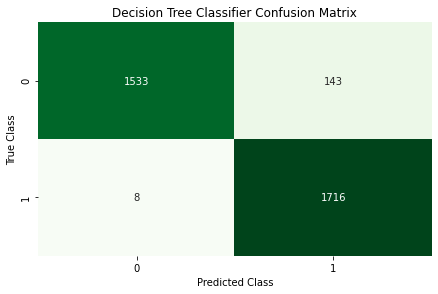

In [80]:
# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, pred_dt_test), annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Decision Tree Classifier Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Feature importance

In [38]:
modelDt.feature_importances_

array([0.02523108, 0.06919577, 0.05227362, 0.04555065, 0.05019786,
       0.00377071, 0.00782953, 0.00497727, 0.00251642, 0.00153571,
       0.01002768, 0.01725294, 0.00445786, 0.00606869, 0.00698651,
       0.00497654, 0.00830496, 0.00602475, 0.00692356, 0.00567797,
       0.00666991, 0.00740947, 0.00431031, 0.00359503, 0.00721489,
       0.00133195, 0.00495896, 0.00572646, 0.00360264, 0.00290293,
       0.00202131, 0.14127958, 0.46919647])

### Deployment

In [82]:
# For deploying

import pickle
filename = 'Decision_model.sav'
pickle.dump(modelDt, open(filename, 'wb'))

In [86]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
predictions = loaded_model.predict(X_test)
print(result)

0.9555882352941176


In [87]:
predictions

array([1, 0, 1, ..., 1, 0, 0])